In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset
base_dir = '/content/sample_data'

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),  # Resize images to model input size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 493 images belonging to 4 classes.
Found 122 images belonging to 4 classes.


In [3]:
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, InceptionV3
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Example: Load a pre-trained model and fine-tune
def create_model(base_model):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(len(train_data.class_indices), activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Models
models = {
    "VGG16": create_model(VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))),
    "ResNet50": create_model(ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))),
    "MobileNetV2": create_model(MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))),
    "InceptionV3": create_model(InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))),
}

# Train models
history_dict = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    history = model.fit(train_data, validation_data=val_data, epochs=10)
    history_dict[model_name] = history


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training VGG16...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.2897 - loss: 4.2761 - val_accuracy: 0.3934 - val_loss: 1.1443
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 64s 482ms/step - accuracy: 0.3555 - loss: 1.1390 - val_accuracy: 0.3934 - val_loss: 1.1138
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 482ms/step - accuracy: 0.2837 - loss: 1.1275 - val_accuracy: 0.3279 - val_loss: 1.1398
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 503ms/step - accuracy: 0.3047 - loss: 1.1381 - val_accuracy: 0.4016 - val_loss: 1.0971
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 487ms/step - accuracy: 0.3820 - loss: 1.0937 - val_accuracy: 0.3934 - val_loss: 1.1158
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 498ms/step - accuracy: 0.4033 - loss: 1.1002 - val_accuracy: 0.4016 - val_loss: 1.0602
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 501ms/step - accuracy: 0.4583 - loss: 1.0473 - val_accuracy: 0.5574 - val_loss: 0.9469
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 512ms/step - accuracy: 0.5462 - loss: 0.9248 - val_accuracy: 0.5984 - va

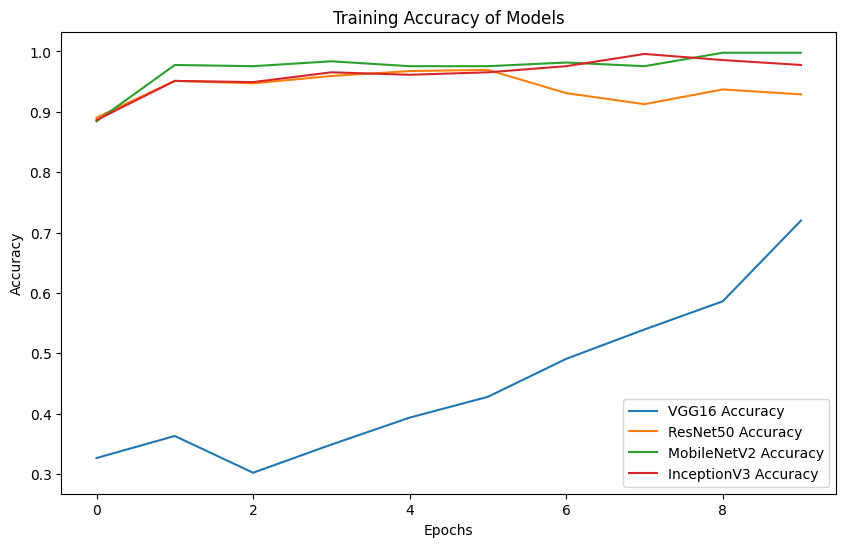

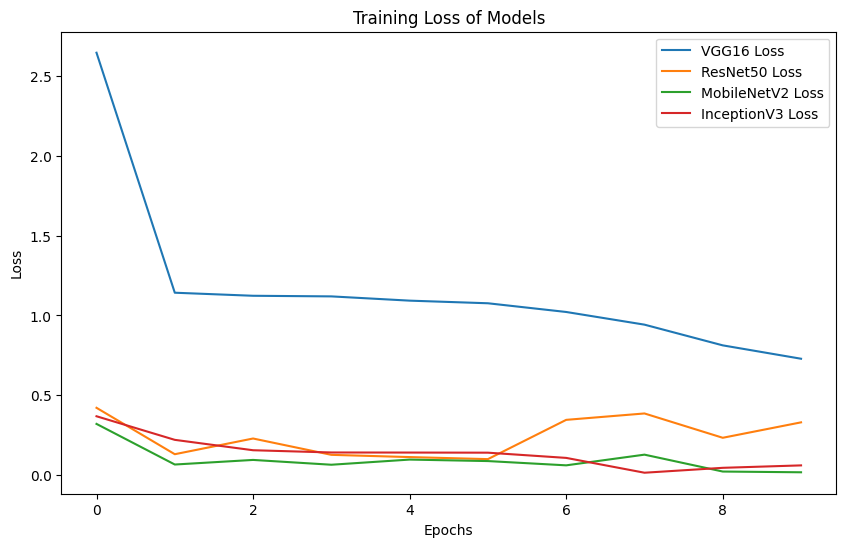

In [4]:
import matplotlib.pyplot as plt

def plot_metrics(history, metric, title):
    plt.figure(figsize=(10, 6))
    for model_name, hist in history.items():
        plt.plot(hist.history[metric], label=f"{model_name} {metric.capitalize()}")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()


plot_metrics(history_dict, 'accuracy', 'Training Accuracy of Models')


plot_metrics(history_dict, 'loss', 'Training Loss of Models')

In [5]:
import pandas as pd

# Assuming test_data is loaded similarly as train_data
comparison = []

for model_name, model in models.items():
    test_loss, test_accuracy = model.evaluate(val_data)
    comparison.append({
        "Model": model_name,
        "Test Accuracy": test_accuracy,
        "Test Loss": test_loss
    })

comparison_df = pd.DataFrame(comparison)
print(comparison_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.6958 - loss: 0.7421
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.3834 - loss: 12536.4385
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.3436 - loss: 29.7061
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.6036 - loss: 3.6924
         Model  Test Accuracy     Test Loss
0        VGG16       0.721311      0.742743
1     ResNet50       0.393443  12857.389648
2  MobileNetV2       0.327869     30.172495
3  InceptionV3       0.581967      4.227926
